In [7]:
import sys # импортируем библиотеки
import numpy
import math
import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
import re
import sys
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import statistics
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import Entrez
from Bio import SeqIO
Entrez.email= "pavel-kravchenk0@yandex.ru"
from Bio.SeqUtils import GC
from time import clock
from dna_features_viewer import GraphicFeature, GraphicRecord, CircularGraphicRecord
from dna_features_viewer import BiopythonTranslator
import subprocess
import random
from random import randrange 
import argparse
from itertools import groupby
import itertools
from Bio.Alphabet import generic_dna
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import IUPAC, Gapped
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
from sys import argv
from Bio import AlignIO
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from scipy import stats
from __future__ import print_function, division
import matplotlib.pyplot as plt
from IPython.core import page
page.page = print
import networkx as nx
from skbio import DNA, TabularMSA
import skbio.io
from skbio.alignment import local_pairwise_align_ssw, global_pairwise_align_nucleotide
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
from fuzzywuzzy import fuzz
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.codonalign.codonseq import _get_codon_list, CodonSeq, cal_dn_ds
from Bio.codonalign.codonalphabet import (default_codon_table, default_codon_alphabet)
from statistics import mean 
from sklearn.manifold import TSNE
import operator
from fuzzywuzzy import process 
import os, io, random
import string
from Bio.Align import MultipleSeqAlignment
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [7]:

#///////////////////////////////////
code_calc = {"UUU": 0, "UUC": 0, "UUA": 0, "UUG": 0, # словарь для хранения встреченных кодонов
    "UCU": 0, "UCC": 0, "UCA": 0, "UCG": 0,
    "UAU": 0, "UAC": 0, "UAA": 0, "UAG": 0,
    "UGU": 0, "UGC": 0, "UGA": 0, "UGG": 0,
    "CUU": 0, "CUC": 0, "CUA": 0, "CUG": 0,
    "CCU": 0, "CCC": 0, "CCA": 0, "CCG": 0,
    "CAU": 0, "CAC": 0, "CAA": 0, "CAG": 0,
    "CGU": 0, "CGC": 0, "CGA": 0, "CGG": 0,
    "AUU": 0, "AUC": 0, "AUA": 0, "AUG": 0,
    "ACU": 0, "ACC": 0, "ACA": 0, "ACG": 0,
    "AAU": 0, "AAC": 0, "AAA": 0, "AAG": 0,
    "AGU": 0, "AGC": 0, "AGA": 0, "AGG": 0,
    "GUU": 0, "GUC": 0, "GUA": 0, "GUG": 0,
    "GCU": 0, "GCC": 0, "GCA": 0, "GCG": 0,
    "GAU": 0, "GAC": 0, "GAA": 0, "GAG": 0,
    "GGU": 0, "GGC": 0, "GGA": 0, "GGG": 0}

SD = ({'A':0.29,'T':0.47,'G':0.11,'C':0.13},
      {'A':0.42,'T':0.00,'G':0.15,'C':0.43},
      {'A':0.81,'T':0.11,'G':0.00,'C':0.08},
      {'A':0.00,'T':0.00,'G':1.0,'C':0.00},
      {'A':0.00,'T':0.00,'G':1.0,'C':0.00},
      {'A':0.97,'T':0.00,'G':0.02,'C':0.01},
      {'A':0.23,'T':0.07,'G':0.66,'C':0.04},)

code = {"UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L", # словарь для перекодирования
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "UAU": "Y", "UAC": "Y", "UAA": "STOP", "UAG": "STOP",
    "UGU": "C", "UGC": "C", "UGA": "STOP", "UGG": "W",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "AAN": "!", "AUN": "!", "ACN": "!", "AGN": "!",
    "UAN": "!", "UAN": "!", "UAN": "!", "UAN": "!",
    "GAN": "!", "GAN": "!", "GAN": "!", "GAN": "!",
    "CAN": "!", "CAN": "!", "CAN": "!", "CAN": "!",
    "ANN": "!", "UNN": "!", "GNN": "!", "CNN": "!"}


def checkSD(SD_seq): 
    score = 0
    for n in range(len(SD_seq)-7):
        sub = SD_seq[n:n+7]
        subscore = 1
        for l in range(len(sub)):
            if sub[l] in SD[l]:
                subscore *= SD[l][sub[l]]
            else:
                subscore *= 0
        score = max(subscore, score)
    return score


def ProteinAnalysis_func(protein):
    try:
        X = ProteinAnalysis(protein)
        molecular_weight = X.molecular_weight()
        aromaticity = X.aromaticity()
        instability_index = X.instability_index()
        isoelectric_point = X.isoelectric_point()
        gravy = X.gravy()
        return round(molecular_weight, round_param), round(aromaticity, round_param), round(instability_index, round_param), round(isoelectric_point, round_param), round(gravy, round_param)
    except ValueError:
        return None, None, None, None, None
    except ZeroDivisionError:
        return None, None, None, None, None
    
def getGC(seq): #Calculate GC content
    try:
        total = 0
        GC = 0
        seqTot = seq.replace('N','')
        seqNoAT = re.sub('[ATN]', '', seq)
        total += len(seqTot)
        GC += len(seqNoAT)
        return round(GC/total, round_param)
    except ZeroDivisionError:
        return 0

def scoreTr(code_calc_seq, amino_info_collector_seq, code_calc_prot, amino_info_collector_prot): #Score self Trtable against global tr table (compare frequencies of each codon)
    score = 0
    for key in code_calc_prot.keys():
        if code[key] in amino_info_collector_prot:
            code_calc_prot[key] = code_calc_prot[key]/amino_info_collector_prot[code[key]]
        else:
            code_calc_prot[key] = 0

    for key in code_calc_prot.keys():
        score += (code_calc_prot[key] - code_calc_seq[key])**2 #Score is sum of the squares of the differences
    return round(score, round_param)
   
    
def blast_search(record_id, record):
    #Do blastn search and search results in xml file
    print("Starting QBlast search...")
    result_handle = NCBIWWW.qblast("blastn", "nt", record, hitlist_size=20, format_type="XML", genetic_code="Vertebrate Mitochondrial")
    blast_results = result_handle.read()
    save_file = open("blast_" + record_id + ".xml", "w")
    print("Writing QBlast search results...")
    save_file.write(blast_results)
    save_file.close()
    print("Finished QBlast.")

    #Open blast xml and load the blast record
    result_handle = open("blast_" + record_id + ".xml")
    blast_records = NCBIXML.parse(result_handle)
    blast_record = blast_records.__next__()

    #Store all accession ids
    output = {}
    for x in blast_record.alignments:
        output[x.accession] = [x.length]
    print("Total " + str(len(output)) + " records retrieved.")

    #Do entrez.efetch to retrieve all records in genbank file, store locally
    local_file = open("blast_" + record_id + ".fasta", 'w')

    counter = 1
    for x in output:
        print(x)
        print("Downloading genbank records " + str(counter) + "...")
        try:
            handle = Entrez.efetch(db="nucleotide",id = x,rettype="fasta", )
            local_file.write(handle.read())
            handle.close()
        except:
            print("Accsession id is not found")
        counter = counter + 1
        print("Progress is {:2.1%}".format(list(output.keys()).index(x)/len(list(output.keys())), end="\r"))
        
    local_file.close()
    print("Finished genbank processing.")
    

def orf_finder(sequence, frame): # модуль для поиска ORFs
    #stop_codons = ['TGA', 'TAG', 'TAA']  # стоп кодоны
    #start_codon = ['ATG'] # старт кодоны (есть дополнительные старт кодоны - )
    standard_table = CodonTable.unambiguous_dna_by_id[genetic_code_table_id]
    
    stop_codons = standard_table.stop_codons  # стоп кодоны
    start_codon = standard_table.start_codons # старт кодоны (есть дополнительные старт кодоны - )
    print("stop_codons used ---", stop_codons)
    print("start_codon used ---", start_codon)
    
    start_positions = []
    stop_positions = []
    position_dict = {}
    orffound = {}
    #print(sequence)
    
    for i in range(frame, len(sequence), 3):  # рубим последовательнсть на тройки
        #print(i)
        codon = sequence[i:(i + 3)].upper()
        #print(codon)
        if codon in start_codon:  # проверяем на вхождение в старт\стоп кодоны
            start_positions.append(i)
            #print(start_positions)
            #print("codon in start_codon")
        if codon in stop_codons:
            stop_positions.append(i)
            #print("codon in stop_codons")
            
    #print(start_positions)
    if len(start_positions) >= 1 and len(stop_positions) >= 1:
        counter = 0
        for position_start in start_positions:  # делаем словарь ORFs
            for position_stop in stop_positions:
                delta = int(position_stop) - int(position_start)
                if minimal_len_prot_3 < delta and maximal_len_prot_3 > delta:
                    nameorf = "orf" + str(counter)
                    counter += 1
                    orffound[nameorf] = position_start, position_stop
                    break
                else:
                    pass
    return orffound


def module_fasta_writer(out_file, line):  # модуль для записи в fasta формате 
    start_point = 0 # writes in fasta format by 60 nums in each line
    end_point = 60
    if len(line) > 60:
        len_line = len(line)
        while len_line > 0:
            j = line[start_point:end_point]
            len_line = len_line - 60
            out_file.write(j + "\n")
            start_point = start_point + 60
            end_point = end_point + 60
    else:
        out_file.write(line + "\n")


def codon_stat(line_in, frame=0):
    line_in = line_in.replace('T', 'U') # делаем из ДНК РНК ;)
    amino_info_collector = {}
    code_calc_tmp = code_calc.copy()
    #print(line_in)
    #print(code_calc_tmp)

    for i in range(frame, len(line_in), 3):
        #print(i)
        codon = line_in[i:(i + 3)]
        #print(codon)
        if codon in code_calc_tmp.keys(): # считаем кодоны
            code_calc_tmp[codon] = int(code_calc_tmp[codon]) + 1

        if codon in code.keys(): # считаем аминокислоты, но другим способом
            ama = code[codon]
            if ama in amino_info_collector.keys():
                amino_info_collector[ama] = int(amino_info_collector[ama]) + 1
            else:
                amino_info_collector[ama] = 1
    
    #print(code_calc_tmp, amino_info_collector)
    return code_calc_tmp, amino_info_collector


def nuc_stat_counter(sequence): # модуль для подсчета нуклеотидов
    nuc_collector = {}
    for i in range(len(sequence)):
        nuc = sequence[i]
        if nuc in nuc_collector.keys():
            nuc_collector[nuc] = int(nuc_collector[nuc]) + 1
        else:
            nuc_collector[nuc] = 1
    return nuc_collector


def plot_local_gc_content(record, window_size, ax):
    gc_content = lambda s: 100.0*len([c for c in s if c in "GC"]) / len(s)
    yy = [gc_content(record.seq[i:i+window_size])
          for i in range(len(record.seq)-window_size)]
    #print(yy)
    xx = np.arange(len(record.seq)-window_size)
    #print(xx)
    ax.fill_between(xx, yy, alpha=0.5)
    ax.set_ylabel("GC(%)")
    
    
def reverseComplement(s):
    sequence = Seq(s, generic_dna)
    sequence_rev = str(sequence.reverse_complement())
    return sequence_rev


def longestStem(s, stem_threshold):
    n = len(s)
    k = int(n/2) #length of longest possible stem
    candidate = ''
    i = 1
    start1 = None
    start2 = None
    
    while i <= k and len(candidate) == i - 1:
        for j in range(n-2*i+1):
            t = s[j:i+j]
            if reverseComplement(t) in s[i+j:]:
                #print(s.find(reverseComplement(t)), s.find(s[i+j:]))
                if s[i+j:].find(reverseComplement(t)) - j > stem_threshold:
                    candidate = t
                    start1 = j
                    start2 = s[i+j:].find(reverseComplement(t))
                    break
        i +=1
    return candidate, start1, start2




#///////////////////////////////////
root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)
    
minimal_len_prot = 10 #int(input("Type the minimal protein length "))
maximal_len_prot = 100 #int(input("Type the maximal protein length "))
minimal_len_prot_3 = minimal_len_prot * 3 # получили длину в нуклеотидах
maximal_len_prot_3 = maximal_len_prot * 3

hist = "y" # str(input("Do you want to see a prot histogram visualization? [y]/[n] "))
bin_size = 20 # int(input("Type the bin size for protein histogram "))
round_param = 4
genetic_code_table_id = 1
stem_threshold = 3
gap_threshold = 0.25
    
files_gb = [f for f in os.listdir("./data") if os.path.splitext(f)[1] == '.gb'] 
print("Input files ... ")
[print(x) for x in files_gb]
print(len(files_gb))
print("")

for file_gb in files_gb:
    print(file_gb, "is processing")
    record = SeqIO.read("./data/" + file_gb, "genbank")
    features_list = []

    organism = record.annotations["organism"]
    for feature in record.features:
        product = None
        note = None
        codon_start = None
        protein_id = None
        translation = None
        start = None
        end = None
        strand = None
        feature_type = None
        gene = None
        transl_table = None
        

        #print(feature.qualifiers)   
        if "'product'" in str(feature.qualifiers):
            product = str(feature.qualifiers['product'])[2:-2]
            #print(product)
        if "'gene'" in str(feature.qualifiers):
            gene = str(feature.qualifiers['gene'])[2:-2]
            #print(gene)
        if "'note'" in str(feature.qualifiers):
            note = str(feature.qualifiers['note'])[2:-2]
            #print(note)   
        if "'codon_start'" in str(feature.qualifiers):
            codon_start = str(feature.qualifiers['codon_start'])[2:-2]   
            #print(codon_start)                     
        if "'protein_id'" in str(feature.qualifiers):
            protein_id = str(feature.qualifiers['protein_id'])[2:-2]   
            #print(protein_id) 
        if "'translation'" in str(feature.qualifiers):
            translation = str(feature.qualifiers['translation'])[2:-2]   
            #print(translation) 
        if "'transl_table'" in str(feature.qualifiers):
            transl_table = str(feature.qualifiers['transl_table'])[2:-2]   
            #print(translation) 
            
        start = int(feature.location.start)
        end = int(feature.location.end)
        strand = str(feature.strand)
        feature_type = str(feature.type)
  
        if feature_type not in ["gene", "source", "STS", "D-loop"]:
            #print(str(feature.qualifiers))
            features_list.append([start, end, strand, feature_type, gene, product, transl_table])

                
    #print(features_list)        


    sequence = str(record.seq)
    record_id = record.id
    print("Seq record_id is ", record_id)
    print("Seq length is ", len(sequence))

    basicdir = os.path.abspath('results_for_{organism}/'.format(organism=organism)) # директория для общих файлов

    if not os.path.exists(basicdir): # если нет basicdir, то создаем
        os.makedirs(basicdir)
    os.chdir(basicdir) # заходим в неё
    # теперь работаем и сохраняем только в ней

    #complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}  # делаем reverse-complement последовательности
    #sequence_rev = "".join(complement.get(base, base) for base in reversed(sequence))

    # можно с помощью функции
    #print(sequence)
    sequence = Seq(sequence, generic_dna)
    sequence_rev = str(sequence.reverse_complement())

    sequence = str(sequence)

    print("GC%", getGC(sequence))
    print("")

    orf_count = 0
    orf_dict = {}
    for i in range(3):  # перебираем каждую из рамок на прямой цепи
        print("Iteration", i)
        frame = i
        orfs = orf_finder(sequence, frame) # запускаем функцию поиска (последовательность, рамка)
        orf_dict[i] = orfs
        orf_count += len(orfs)


    for j in range(3): # и на обратной
        print("Iteration", -j)
        frame_rev = j
        orfs_rev = orf_finder(sequence_rev, frame_rev)
        orf_dict[j + 3] = orfs_rev
        orf_count += len(orfs)

    print("There have been found ...", orf_count, "ORFs")    

    # получили словари с ORFs по рамкам
    out_protein_orf_record_id = "out_protein_orf_" + str(record_id) + ".csv"
    with open(out_protein_orf_record_id, "w") as out_file:
        out_file.write("Nuc_seq" + 
                       "\t" + "Amino_seq" + 
                       "\t" + "SD_seq" + 
                       "\t" + "SD_score" + 
                       "\t" + "Srtand" + 
                       "\t" + "Frame" + 
                       "\t" + "Left_border" + 
                       "\t" + "Right_border" + 
                       "\t" + "Ama_len" + 
                       "\t" + "GC%" + 
                       "\t" + "GC_fold_change" + 
                       "\t" + "ScoreTr" + 
                       "\t" + "Features" + 
                       "\t" + "Molecular_weight" + 
                       "\t" + "Aromaticity" + 
                       "\t" + "Instability_index" + 
                       "\t" + "Isoelectric_point" + 
                       "\t" + "Gravy" + 
                       "\t" + "Stem_loop_seq" +
                       "\t" + "Stem_loop_found_seq" +
                       "\t" + "Stem_loop_position" +
                       "\t" + "Organism" +
                       "\t" + "Record_id" +
                       "\n")

        for i in orf_dict.keys():  # for frame in dict --- для каждой из рамок
            print("Current frame is ",i)
            bin_len_list = []
             

            if int(i) <= 2:
                #print(sequence)
                code_calc_seq, amino_info_collector_seq = codon_stat(sequence, i)

            if int(i) > 2:
                #print(sequence_rev)
                code_calc_seq, amino_info_collector_seq = codon_stat(sequence_rev, i-3)

            prot_calc = 0 # заводим счетчики для полипептидов         
            #print(len(orf_dict[i]))
            for j in orf_dict[i]:  # for orf in frame --- для каждой ORF
                #print(j)

                if int(i) <= 2: 
                    left_border = int(orf_dict[i][j][0]) - 1
                    right_border = int(orf_dict[i][j][1]) - 1


                    subseq = sequence[left_border:right_border]
                    line = str(Seq(subseq, generic_dna).translate(table=genetic_code_table_id, to_stop=False))   
                    if "*" in line:
                        #print("STOP found")
                        continue
                        
                    bin_len_list = bin_len_list + [len(line)]

                    SD_seq = sequence[left_border - 20:left_border]
                    if len(SD_seq) == 20:
                        SD_score = checkSD(SD_seq)
                    else:
                        SD_score = None

                    code_calc_prot, amino_info_collector_prot = codon_stat(subseq)
                    scoreTr_result = scoreTr(code_calc_seq, amino_info_collector_seq, 
                                             code_calc_prot, amino_info_collector_prot)    

                    features_for_orfs = []
                    for e in features_list:
                        if left_border > e[0] and right_border < e[1]:
                            features_for_orfs.append([e[2], e[3], e[4], e[5], e[6]])
                    molecular_weight, aromaticity, instability_index, isoelectric_point, gravy = ProteinAnalysis_func(line)

                    left_border_stem_loom = left_border - 20
                    right_border_stem_loom = right_border + 20


                    Stem_loop_found_seq, Stem_loop_start, Stem_loop_end = longestStem(sequence[left_border_stem_loom:right_border_stem_loom], stem_threshold)
                    prot_calc += 1
                    
                    out_file.write(subseq + 
                                   "\t" + line + 
                                   "\t" + SD_seq + 
                                   "\t" + str(SD_score) + 
                                   "\t" + "1" + 
                                   "\t" + str(i) + 
                                   "\t" + str(left_border) + 
                                   "\t" + str(right_border) + 
                                   "\t" + str(int((right_border - left_border)/3)) + 
                                   "\t" + str(getGC(subseq)) + 
                                   "\t" + str(getGC(subseq)/getGC(sequence)) + 
                                   "\t" + str(scoreTr_result) + 
                                   "\t" + str(features_for_orfs) + 
                                   "\t" + str(molecular_weight) + 
                                   "\t" + str(aromaticity) + 
                                   "\t" + str(instability_index) + 
                                   "\t" + str(isoelectric_point) + 
                                   "\t" + str(gravy) + 
                                   "\t" + str(sequence[left_border - 20:left_border + 20]) +
                                   "\t" + str(Stem_loop_found_seq) +
                                   "\t" + str([Stem_loop_start, Stem_loop_end]) +
                                   "\t" + str(organism) +
                                   "\t" + str(record_id) +
                                   "\n")
                else:
                    pass


                ###############################
                if int(i) > 2:
                    left_border = int(orf_dict[i][j][0]) - 1
                    right_border = int(orf_dict[i][j][1]) - 1

                    subseq = sequence_rev[left_border:right_border]
                    line = str(Seq(subseq, generic_dna).translate(table=genetic_code_table_id, to_stop=False))   
                    if "*" in line:
                        #print("STOP found")
                        continue
                    #print(line)
                    
                    bin_len_list = bin_len_list + [len(line)]
                    SD_seq = sequence_rev[left_border - 20:left_border]
                    #print(len(SD_seq))
                    if len(SD_seq) == 20:
                        SD_score = checkSD(SD_seq)
                    else:
                        SD_score = None
                    code_calc_prot, amino_info_collector_prot = codon_stat(subseq)
                    scoreTr_result = scoreTr(code_calc_seq, amino_info_collector_seq, code_calc_prot, amino_info_collector_prot)    

                    features_for_orfs = []
                    for e in features_list:
                        if left_border > e[0] and right_border < e[1]:
                            features_for_orfs.append([e[2], e[3], e[4], e[5], e[6]])

                    left_border_stem_loom = left_border - 20
                    right_border_stem_loom = right_border + 20

                    molecular_weight, aromaticity, instability_index, isoelectric_point, gravy = ProteinAnalysis_func(line)


                    Stem_loop_found_seq, Stem_loop_start, Stem_loop_end = longestStem(sequence_rev[left_border_stem_loom:right_border_stem_loom], stem_threshold)
                    prot_calc += 1
                    out_file.write(subseq + 
                                   "\t" + line + 
                                   "\t" + SD_seq + 
                                   "\t" + str(SD_score) + 
                                   "\t" + "-1" + 
                                   "\t" + str(i) + 
                                   "\t" + str(len(sequence)- int(orf_dict[i][j][1]) - 1) + 
                                   "\t" + str(len(sequence)- int(orf_dict[i][j][0]) - 1) + 
                                   "\t" + str(int((right_border - left_border)/3)) + 
                                   "\t" + str(getGC(subseq)) + 
                                   "\t" + str(getGC(subseq)/getGC(sequence_rev)) + 
                                   "\t" + str(scoreTr_result) + 
                                   "\t" + str(features_for_orfs) + 
                                   "\t" + str(molecular_weight) + 
                                   "\t" + str(aromaticity) + 
                                   "\t" + str(instability_index) + 
                                   "\t" + str(isoelectric_point) + 
                                   "\t" + str(gravy) +
                                   "\t" + str(sequence_rev[left_border - 20:left_border + 20]) +
                                   "\t" + str(Stem_loop_found_seq) +
                                   "\t" + str([Stem_loop_start, Stem_loop_end]) +
                                   "\t" + str(organism) +
                                   "\t" + str(record_id) +
                                   "\n")
                else:
                    pass



            print("It has been found " + str(prot_calc) + " proteins")
            print("")

            try:
                #print("Protein length by bins:")
                #print("Bin size =", bin_size)
                l = numpy.array(bin_len_list)
                bins = numpy.arange(0, max(l), bin_size)
                #print("Bin" + "\t" + "Score")
                #for s in range(1,len(bins)):
                #    print(str(s) + "\t" + str(len(l[numpy.digitize(l, bins) == s])))
                #print("")

                if hist == "y":
                    fig = matplotlib.pyplot.gcf()
                    fig.set_size_inches(16, 10)
                    sns.set_context("paper", font_scale=2)

                    plt.hist(l, bin_size, alpha = 0.8)
                    plt.xlim([min(bin_len_list)- 5, max(bin_len_list) + 5])
                    plt.title("Histogram of protein length for seq {record_id} in frame {frame}".format(record_id=record_id, frame=i))
                    plt.xlabel('Length')
                    plt.ylabel('Number of proteins')

                    plt.savefig('Histogram_of_protein_length_record_id_{record_id}_frame_{frame}.pdf'.format(record_id=record_id, frame=i), dpi=200)
                    #plt.show()
                    plt.gcf().clear()
                #print("")
            except ValueError:
                continue
    
    '''
    final_table = pd.read_csv(out_protein_orf_record_id, sep='\t').dropna()
    final_table['index'] = range(0, len(final_table))

    #print(final_table)

    features = []

    for i,j,k,q in zip(final_table["Left_border"], final_table["Right_border"], final_table["Srtand"], final_table["Features"]):
        #print(i,j,k,q)
        #print(k)
        if k == 1:
            #print(1)
            features.append(GraphicFeature(start=i, end=j, strand=1, color='#ffcccc', label=q))
        if k == -1:
            #print(-1)
            #print(len(sequence))
            features.append(GraphicFeature(start=i, end=j, strand=-1, color='#cffccc', label=q))

    #print(features)


    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(200, 60), sharex=True)

    # Parse the genbank file, plot annotations

    graphic_record = BiopythonTranslator().translate_record(record)
    graphic_record.plot(ax=ax1, with_ruler=True)

    plot_local_gc_content(record, window_size=100, ax=ax2)

    plt.savefig(basicdir + "/Genome_" + str(record_id) + ".pdf", dpi=200)

    my_record = GraphicRecord(sequence_length=len(sequence), sequence=sequence, features = features)
    ax, _ = my_record.plot(figure_width=200)
    plt.savefig(basicdir + "/Genome_ORF_" + str(record_id) + ".pdf", dpi=200)
    plt.gcf().clear()
    plt.close(fig)
    plt.close('all')
    fig.clear()


    print("Done")  # the end
    '''    
    #final_table = pd.read_csv(basicdir + "/out_protein_orf_" + str(record_id) + ".csv", sep='\t')
    #final_table['index'] = range(0, len(final_table))
    os.chdir(root)
    
print("Done")  # the end

Input files ... 
Papio_anubis_isolate.gb
Lingula_anatina.gb
Lepisosteus_oculatus.gb
Homo_sapiens_ssp._Denisova.gb
Phascolarctos_cinereus.gb
Pan_troglodytes_ellioti_mitochondrion.gb
Crassostrea_gigas.gb
branchiostoma.gb
Mizuhopecten_yessoensis.gb
Pan_paniscus.gb
Macaca_fascicularis.gb
Hydra_magnipapillata_mitochondrion.gb
Monodelphis_domestica.gb
Caenorhabditis_elegans_mitochondrion_complete_genome.gb
Rana_catesbeiana.gb
Macaca_mulatta.gb
Aplysia_californica.gb
Panthera_leo.gb
Leucoraja_erinacea.gb
Tetranychus_urticae.gb
Mus_musculus.gb
Tarsius_syrichta.gb
Homo_sapiens_mitochondrion.gb
Pinus_Taeda_mitochondrion_complete_genome.gb
Rattus_norvegicus.gb
Propithecus_coquereli.gb
Rhincodon_typus.gb
Python_bivittatus.gb
Crocodylus_porosus.gb
Homo_sapiens_neanderthalensis_mitochondrion.gb
Gorilla_gorilla_gorilla.gb
Plasmodium_malariae_genome assembly_organelle_mitochondrion.gb
Equus_asinus.gb
Ornithorhynchus_anatinus.gb
Priapulus_caudatus.gb
Pomacea_canaliculata.gb
Saccoglossus_kowalevskii.gb


Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
There have been found ... 1982 ORFs
Current frame is  0
It has been found 177 proteins

Current frame is  1
It has been found 113 proteins

Current frame is  2
It has been found 70 proteins

Current frame is  3
It has been found 38 proteins

Current frame is  4
It has been found 91 proteins

Current frame is  5
It has been found 69 proteins

branchiostoma.gb is processing
Seq record_id is  NC_004537.1
Seq length is  15076
GC% 0.3527

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon use

It has been found 88 proteins

Current frame is  1
It has been found 74 proteins

Current frame is  2
It has been found 82 proteins

Current frame is  3
It has been found 100 proteins

Current frame is  4
It has been found 79 proteins

Current frame is  5
It has been found 74 proteins

Macaca_mulatta.gb is processing
Seq record_id is  NC_005943.1
Seq length is  16564
GC% 0.4323

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
There have been found ... 90

Current frame is  1
It has been found 49 proteins

Current frame is  2
It has been found 56 proteins

Current frame is  3
It has been found 99 proteins

Current frame is  4
It has been found 114 proteins

Current frame is  5
It has been found 103 proteins

Pinus_Taeda_mitochondrion_complete_genome.gb is processing
Seq record_id is  NC_039746.1
Seq length is  1191054
GC% 0

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
There have been found ... 0 ORFs
C

Current frame is  0
It has been found 62 proteins

Current frame is  1
It has been found 65 proteins

Current frame is  2
It has been found 49 proteins

Current frame is  3
It has been found 131 proteins

Current frame is  4
It has been found 124 proteins

Current frame is  5
It has been found 56 proteins

Plasmodium_malariae_genome assembly_organelle_mitochondrion.gb is processing
Seq record_id is  LT594637.1
Seq length is  5969
GC% 0.2987

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_c

Current frame is  1
It has been found 78 proteins

Current frame is  2
It has been found 35 proteins

Current frame is  3
It has been found 151 proteins

Current frame is  4
It has been found 133 proteins

Current frame is  5
It has been found 89 proteins

Metaseiulus_occidentalis.gb is processing
Seq record_id is  NC_009093.1
Seq length is  24961
GC% 0.2403

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
There have been found ... 1151 ORFs
Current fram

It has been found 93 proteins

Current frame is  1
It has been found 79 proteins

Current frame is  2
It has been found 84 proteins

Current frame is  3
It has been found 55 proteins

Current frame is  4
It has been found 44 proteins

Current frame is  5
It has been found 63 proteins

Callorhinchus_milii.gb is processing
Seq record_id is  NC_014285.1
Seq length is  16769
GC% 0.3378

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
There have been found ..

It has been found 88 proteins

Current frame is  1
It has been found 59 proteins

Current frame is  2
It has been found 60 proteins

Current frame is  3
It has been found 119 proteins

Current frame is  4
It has been found 88 proteins

Current frame is  5
It has been found 119 proteins

Microcebus_murinus.gb is processing
Seq record_id is  NC_028718.1
Seq length is  17114
GC% 0.3631

Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration 0
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -1
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
Iteration -2
stop_codons used --- ['TAA', 'TAG', 'TGA']
start_codon used --- ['TTG', 'CTG', 'ATG']
There have been found .

<Figure size 1152x720 with 0 Axes>

In [8]:
def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)

files_in_root = os.listdir(".")
#print(files_in_root)
folders = [x for x in files_in_root if "results_for_" in x]

save_list = []
name_list = []

global_ORF_table = pd.DataFrame()
for folder in folders:
    #print(folder)
    if len(os.listdir(folder)) > 0:
        file_csv = [f for f in os.listdir(folder) if os.path.splitext(f)[1] == '.csv'][0]

        final_table = pd.read_csv(folder + "/" + file_csv, sep='\t').dropna()
        
        final_table = final_table[[True if len(x) != 2 else False for x in list(final_table["Features"])]]
        

        if final_table.shape[0] != 0:
            final_table = final_table[[True if x != "None" else False for x in list(final_table["Instability_index"])]]
        
            final_table = final_table[[True if float(x) < 40 else False for x in list(final_table["Instability_index"])]]
        
            #print(final_table["Amino_seq"])
            save_list.append(set(final_table["Amino_seq"]))
            name_list.append(folder)

            #print(global_ORF_table.shape[0])
            if global_ORF_table.shape[0] == 0:
                global_ORF_table = final_table
            else:
                global_ORF_table = global_ORF_table.append(final_table) 
                #print(global_ORF_table.shape[0])

 
result_all = []
mat_count = np.full((len(save_list), len(save_list)), None)
mat = np.full((len(save_list), len(save_list)), None)

for i in range(len(save_list)):
    for j in range(len(save_list)):
        if i < j:
            #result = []
            #for orf_seq in save_list[i]:
            #    match = match_name(orf_seq, save_list[j], 95)
            #    if match[1] != -1:
            #        result.append(match[0])
                
            result = save_list[i].intersection(save_list[j])
            #print()
            if len(result) > 0:
                mat[i][j] = result
                mat_count[i][j] = len(result)
                result_all.extend(list(result))

 
def preview_MHC(b_fil):
    b_fil.loc['Sum',:] = b_fil.sum(axis=0)
    b_fil.loc[:,'Sum'] = b_fil.sum(axis=1)
    return b_fil

mat_df = pd.DataFrame(mat)
mat_df.columns = [x.split("results_for_")[1] for x in name_list]
mat_df.index = [x.split("results_for_")[1] for x in name_list]

mat_count_df = pd.DataFrame(mat_count)
mat_count_df.columns = [x.split("results_for_")[1] for x in name_list]
mat_count_df.index = [x.split("results_for_")[1] for x in name_list]


mat_count_df_sum = preview_MHC(mat_count_df)

mat_count_df.fillna(0)
mat_df.fillna(0)
print(len(result_all))

2529


<Figure size 432x288 with 0 Axes>

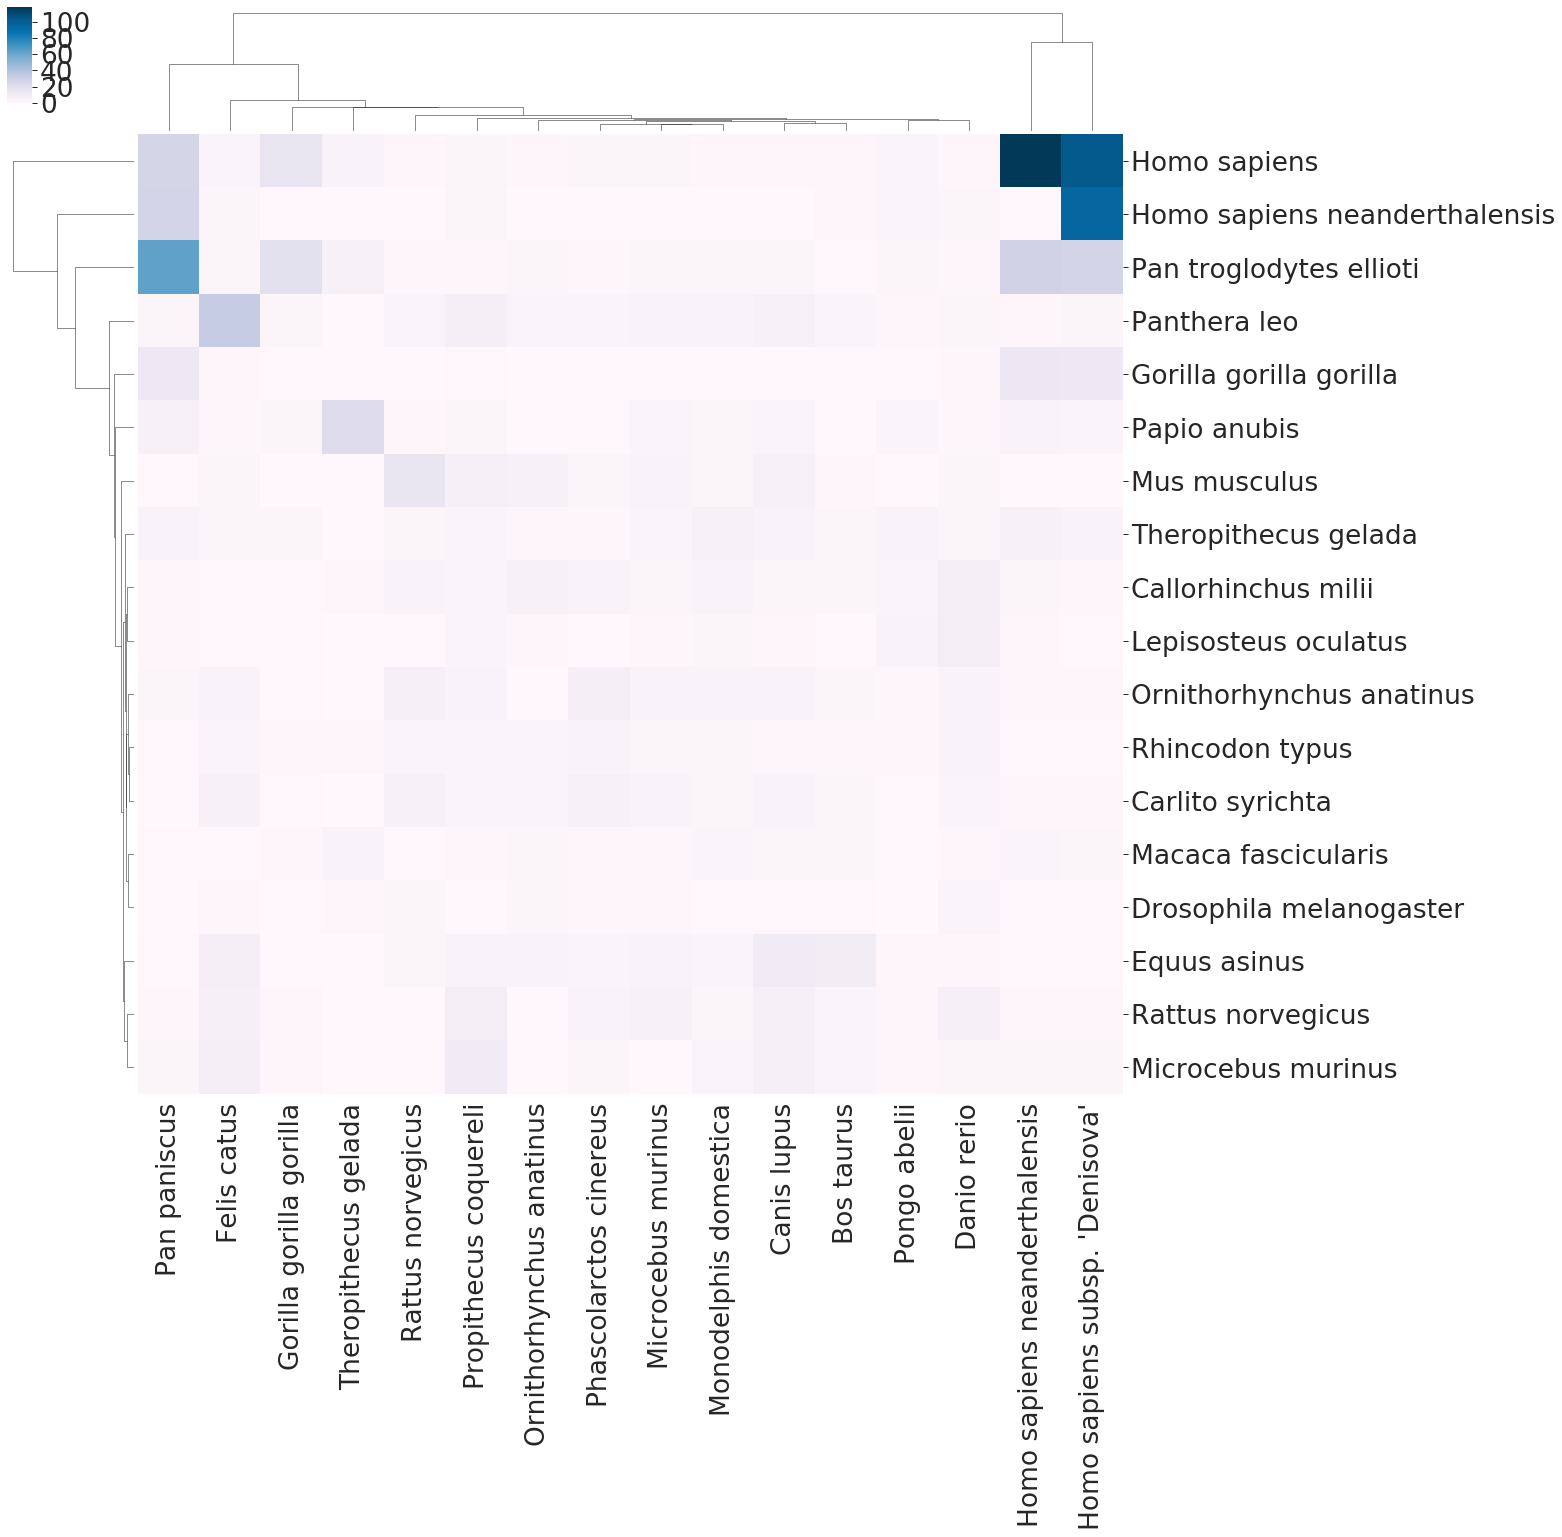

In [9]:

fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(200, 200)
sns.set_context("paper", font_scale=3)

mat_count_df_sum_f = mat_count_df_sum[mat_count_df_sum["Sum"] > 50]
mat_count_df_sum_f = mat_count_df_sum_f.loc[:,  mat_count_df_sum_f.iloc[-1] >= 50]


sns.clustermap(mat_count_df_sum_f.iloc[:-1,:-1].fillna(0), cmap="PuBu", figsize=(20, 20))
#plt.show()

plt.savefig('Heatmap.png', dpi=200)
                    


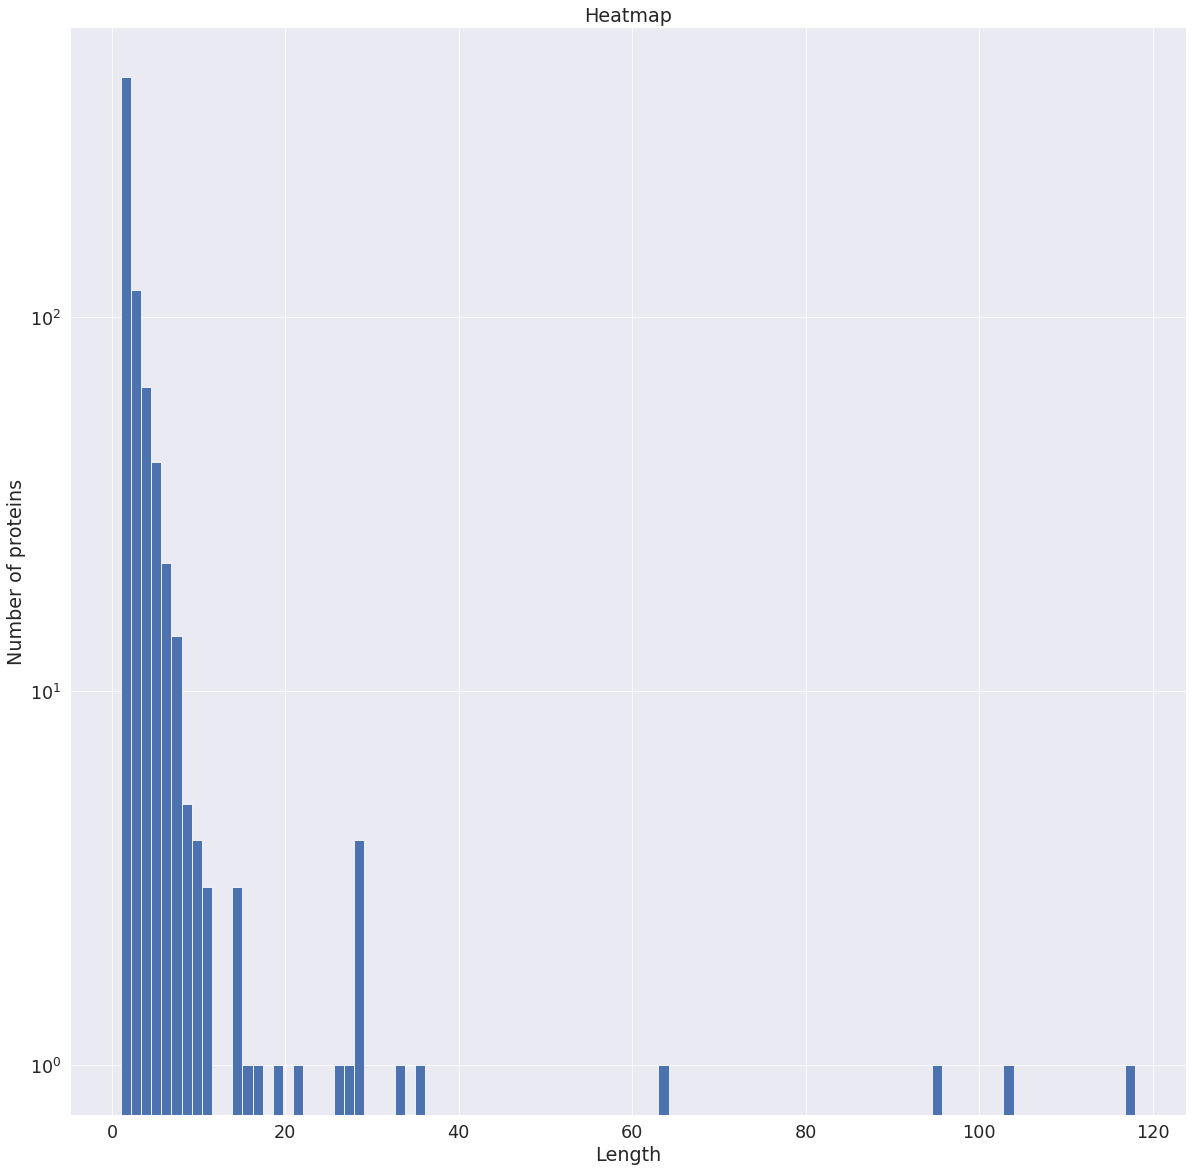

In [10]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
sns.set_context("paper", font_scale=2)

mat_count_df.iloc[:-1,:-1].unstack().hist(bins=100)
plt.yscale('log')
plt.title("Heatmap")
plt.xlabel('Length')
plt.ylabel('Number of proteins')

plt.savefig('Histogram_plot.pdf', dpi=100)


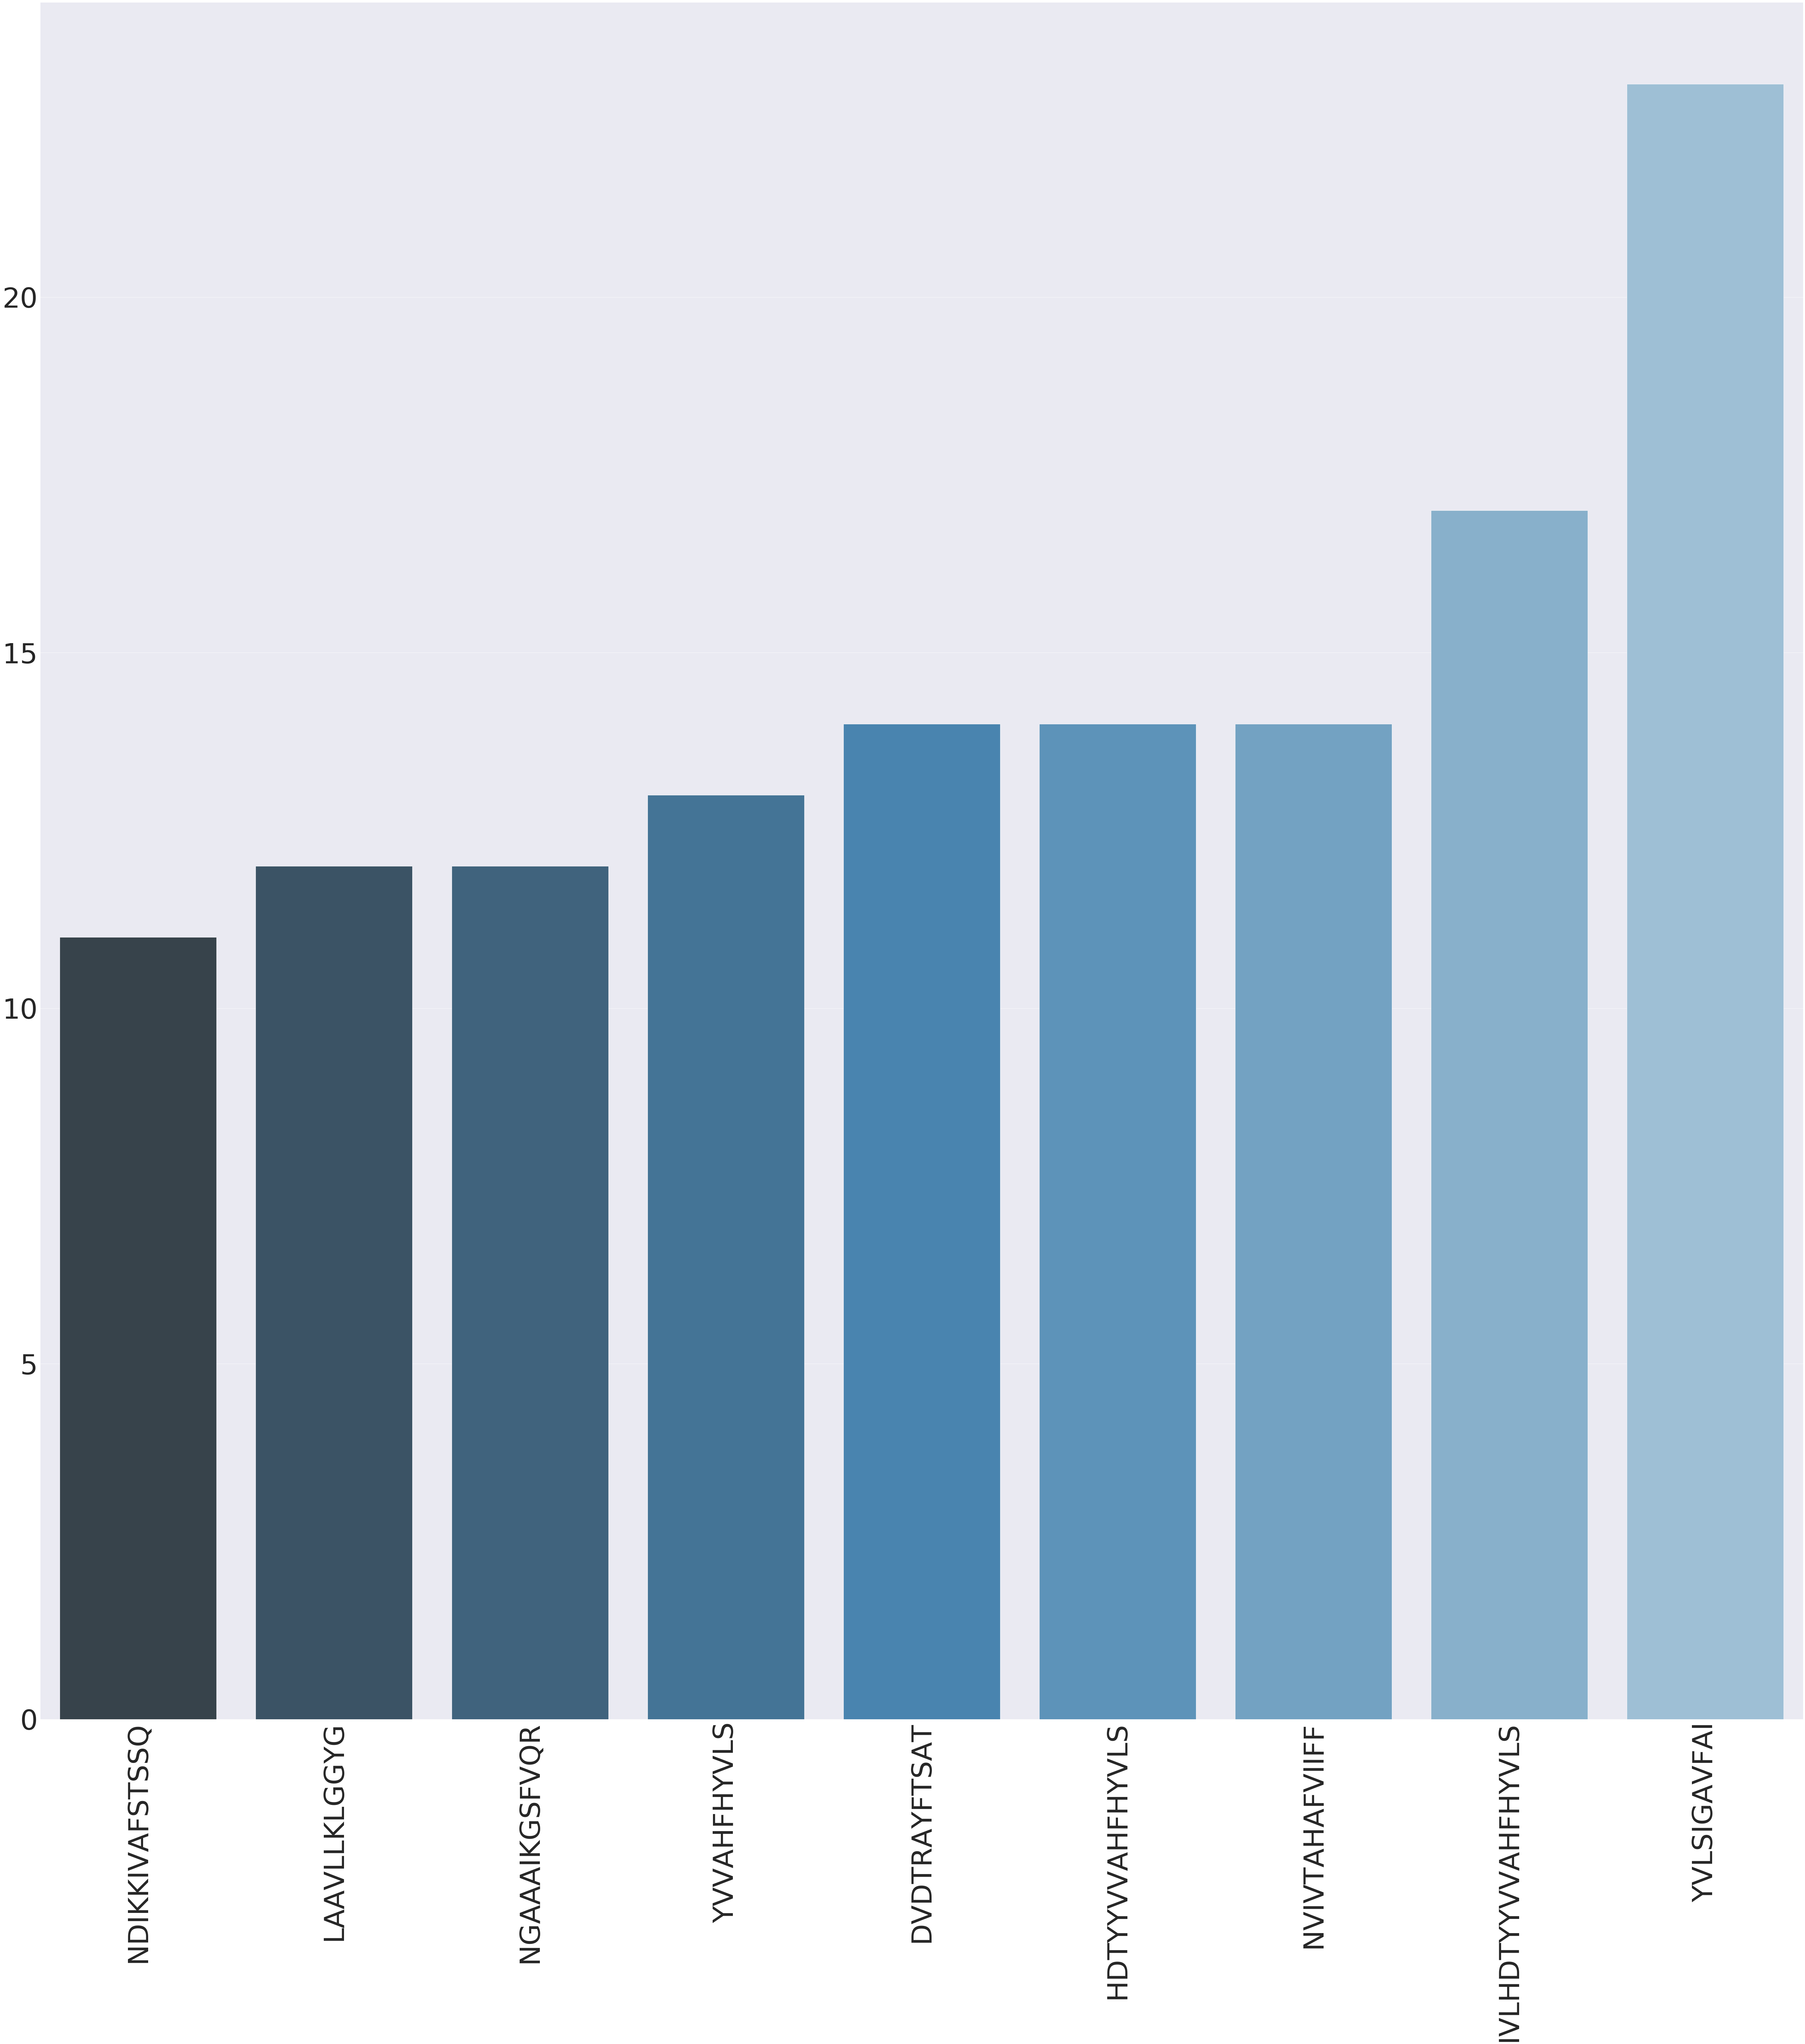

In [11]:
l = list(global_ORF_table["Amino_seq"])
#print(len(l))


count_dict = {} 
unique_list = np.unique(np.array(l))

for orf in unique_list:
    num = l.count(orf)
    count_dict[orf] = num
    
#print(list(count_dict.keys())[:10])

sorted_list = sorted(count_dict.items(), key=lambda kv: kv[1])
#print(len(sorted_list))

y = []
labels = []
for orf in sorted_list:
    if orf[1] > 10:
        #print(orf)
        labels.append(orf[0])
        y.append(orf[1])

x = [x for x in range(len(y))]
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100, 100)
sns.set_context("paper", font_scale=10)

#print(len(x), len(y))
ax = sns.barplot(x=x, y=y, palette="Blues_d")

plt.xticks(x, labels, rotation='vertical')
plt.savefig('Bar_plot_all.pdf', dpi=200)

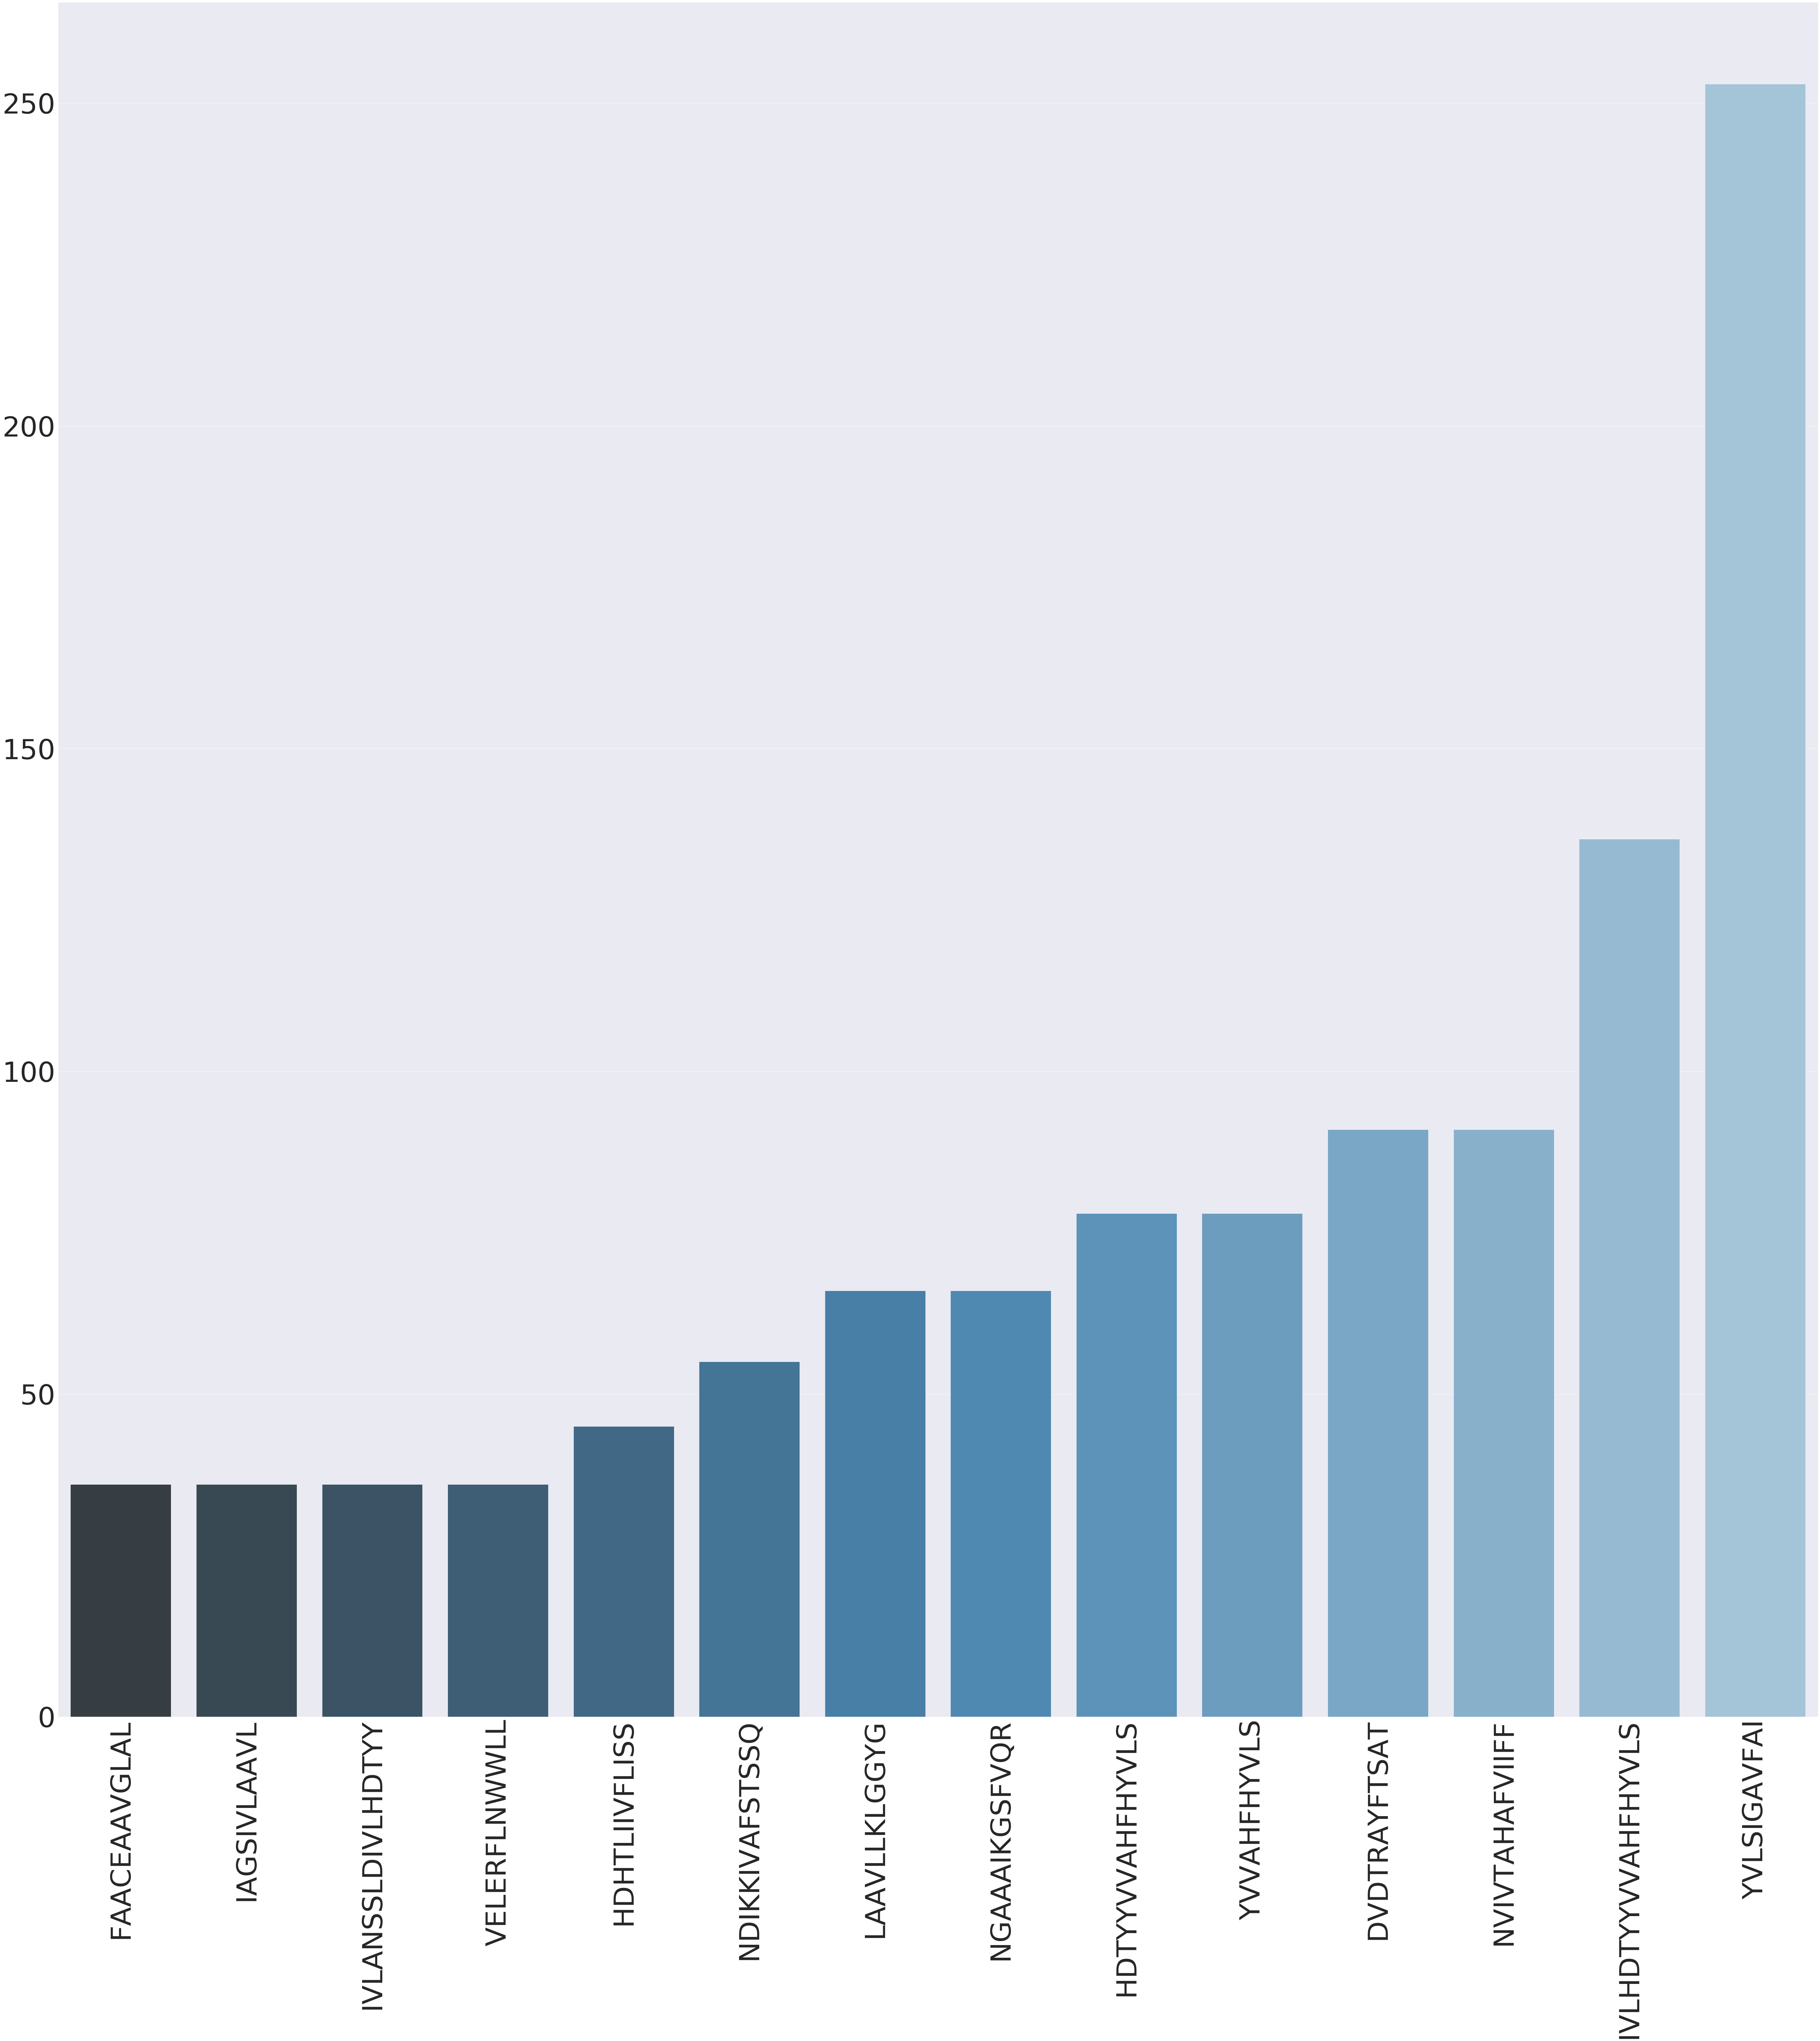

In [12]:
count_dict = {} 
unique_list = np.unique(np.array(result_all))

for orf in unique_list:
    num = result_all.count(orf)
    count_dict[orf] = num
    
#print(count_dict)

sorted_list = sorted(count_dict.items(), key=lambda kv: kv[1])
y = []
labels = []
for orf in sorted_list:
    if orf[1] > 30:
        #print(orf)
        labels.append(orf[0])
        y.append(orf[1])

x = [x for x in range(len(y))]
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100, 100)
sns.set_context("paper", font_scale=10)


ax = sns.barplot(x=x, y=y, palette="Blues_d")

plt.xticks(x, labels, rotation='vertical')
plt.savefig('Bar_plot.pdf', dpi=200)


In [13]:
for k in labels:
    mat_best = np.full((len(save_list), len(save_list)), None)
    for i in range(len(save_list)):
        for j in range(len(save_list)):
            if i < j:  
                result = save_list[i].intersection(save_list[j])
                if k in result:
                    mat_best[i][j] = 1

    print(k)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(20, 20)
    sns.set_context("paper", font_scale=1)

    mat_best_df = pd.DataFrame(mat_best)
    mat_best_df.columns = [x.split("results_for_")[1] for x in name_list]
    mat_best_df.index = [x.split("results_for_")[1] for x in name_list]

    grid = sns.clustermap(mat_best_df.fillna(0), metric="cityblock", col_cluster=False, row_cluster=False, cmap="PuBu")
    grid.cax.set_visible(False)
    plt.savefig("Heatmap_mat_best_exact_" + k +".pdf", dpi=200)
    plt.gcf().clear()
    plt.close(fig)
    plt.close('all')
    fig.clear()



FAACEAAVGLAL
IAGSIVLAAVL
IVLANSSLDIVLHDTYY
VELERFLNWWLL
HDHTLIIVFLISS
NDIKKIVAFSTSSQ
LAAVLLKLGGYG
NGAAAIKGSFVQR
HDTYYVVAHFHYVLS
YVVAHFHYVLS
DVDTRAYFTSAT
NVIVTAHAFVIIFF
IVLHDTYYVVAHFHYVLS
YVLSIGAVFAI


<Figure size 14400x14400 with 0 Axes>

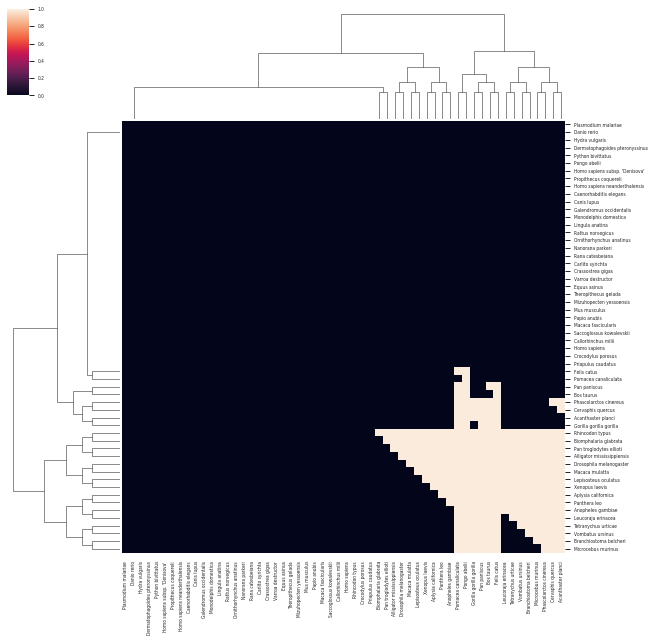

In [13]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(200, 200)
sns.set_context("paper", font_scale=0.5)

mat_best_df = pd.DataFrame(mat_best)
mat_best_df.columns = [x.split("results_for_")[1] for x in name_list]
mat_best_df.index = [x.split("results_for_")[1] for x in name_list]

sns.clustermap(mat_best_df.fillna(0))
plt.savefig('Heatmap_mat_best.pdf', dpi=200)
                

In [14]:
class FEATURE:
    def __init__(self, gene = None, coordinates = None, strand = None, feature_type = None, codon_start = None, product = None, protein_id = None, translation = None, transl_table = None, note = None):
        self.gene = gene
        self.coordinates = coordinates
        self.strand = strand
        self.feature_type = feature_type
        self.product = product
        self.codon_start = codon_start
        self.product = product
        self.protein_id = protein_id
        self.translation = translation
        self.transl_table = transl_table
        self.note = note
        
        
    def __str__(self):
        out = "gene --- {gene} \n coordinates --- {coordinates} \n strand --- {strand} \n feature_type --- {feature_type} \n codon_start --- {codon_start} \n product --- {product} \n protein_id --- {protein_id} \n translation --- {translation} \n transl_table --- {transl_table} \n note --- {note} \n".format(gene=self.gene,
        coordinates=self.coordinates, 
        strand=self.strand, 
        feature_type=self.feature_type, 
        product=self.product, 
        codon_start=self.codon_start, 
        protein_id=self.protein_id, 
        translation=self.translation, 
        transl_table=self.transl_table,
        note = self.note)
        return out


class GB_RECORD:
    def __init__(self, ID = None, Len = None, seq_type = None, 
                 definition = None, organism = None, features = None, 
                 sequence = None, rev_comp_sequence = None, feature_count = None):
        self.ID = ID
        self.Len = Len
        self.seq_type = seq_type
        self.definition = definition
        self.organism = organism
        self.features = features
        self.sequence = sequence
        self.rev_comp_sequence = rev_comp_sequence
        self.feature_count = feature_count
        #print(self.ID,self.Len,self.seq_type,self.definition,self.organism,self.sequence)
        
    def __str__(self):
        out = "ID --- {ID} \t Len --- {Len} \t seq_type --- {seq_type} \n definition --- {definition} \n organism --- {organism} \n sequence --- {sequence} \n rev_comp_sequence --- {rev_comp_sequence} \n feature_count --- {feature_count} \n".format(ID=self.ID,
        Len=self.Len,
        seq_type=self.seq_type,
        definition=self.definition,
        organism=self.organism,
        sequence=self.sequence[:100],
        rev_comp_sequence=self.rev_comp_sequence[:100], 
        feature_count=self.feature_count)
        
        #out = ""
        for i in range(self.feature_count):
            out += str(self.features[i])
        return out
        
root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)

files_gb = [f for f in os.listdir("./Mito complete genjoms/") if os.path.splitext(f)[1] == '.gb'] 
print("Input files ... ")
#[print(x) for x in files_gb]
print(len(files_gb))
print("")
gap_threshold = 0.25
    

gb_record_list = []
for file in files_gb:
    #print(file)
    record = SeqIO.read("./Mito complete genjoms/" + file, "genbank")
    print(record.annotations["organism"])
    
    c = 0
    FEATURE_count = 0
    FEATURE_dict = {}
    for feature in record.features:
        
        product = None
        note = None
        codon_start = None
        protein_id = None
        translation = None
        start = None
        end = None
        strand = None
        feature_type = None
        gene = None
        transl_table = None
        

        #print(feature.qualifiers)   
        if "'product'" in str(feature.qualifiers):
            product = str(feature.qualifiers['product'])[2:-2]
            #print(product)
        if "'gene'" in str(feature.qualifiers):
            gene = str(feature.qualifiers['gene'])[2:-2]
            #print(gene)
        if "'note'" in str(feature.qualifiers):
            note = str(feature.qualifiers['note'])[2:-2]
            #print(note)   
        if "'codon_start'" in str(feature.qualifiers):
            codon_start = str(feature.qualifiers['codon_start'])[2:-2]   
            #print(codon_start)                     
        if "'protein_id'" in str(feature.qualifiers):
            protein_id = str(feature.qualifiers['protein_id'])[2:-2]   
            #print(protein_id) 
        if "'translation'" in str(feature.qualifiers):
            translation = str(feature.qualifiers['translation'])[2:-2]   
            #print(translation) 
        if "'transl_table'" in str(feature.qualifiers):
            transl_table = str(feature.qualifiers['transl_table'])[2:-2]   
            #print(translation) 
            
        start = int(feature.location.start)
        end = int(feature.location.end)
        strand = feature.strand
        feature_type = feature.type
        #print(feature_type)
        if feature_type not in ["gene", "source", "STS", "D-loop"]:
            #print(feature_type)
            FEATURE_dict[FEATURE_count] = FEATURE(gene, [start, end], strand, feature_type, codon_start, product, protein_id, translation, transl_table, note)
            #print(FEATURE_dict[FEATURE_count])
            FEATURE_count += 1

    GB_RECORD_tmp = GB_RECORD(record.id, len(record.seq), record.annotations["molecule_type"], record.description, record.annotations["organism"], FEATURE_dict, str(record.seq), str(record.reverse_complement()), FEATURE_count)
    gb_record_list.append(GB_RECORD_tmp)

print("Done!")   

Input files ... 
73

Papio anubis
Bradyrhizobium diazoefficiens USDA 110
Lingula anatina
Lepisosteus oculatus
Escherichia coli IAI39
Saprolegnia ferax
Homo sapiens subsp. 'Denisova'
Phascolarctos cinereus
Pan troglodytes ellioti
Crassostrea gigas
Branchiostoma belcheri
Sulfolobus acidocaldarius DSM 639
Mizuhopecten yessoensis
Pan paniscus
Macaca fascicularis
Hydra vulgaris
Monodelphis domestica
Mycobacterium tuberculosis H37Rv
Rhizobium leguminosarum bv. trifolii WSM2304
Caenorhabditis elegans
Rana catesbeiana
Macaca mulatta
Aplysia californica
Thermosynechococcus vulcanus NIES-2134
Panthera leo
Leucoraja erinacea
Tetranychus urticae
Mus musculus
Carlito syrichta
Homo sapiens
Arabidopsis thaliana
Pinus taeda
Thermus thermophilus HB8
Rattus norvegicus
Propithecus coquereli
Rhincodon typus
Bacillus subtilis subsp. subtilis str. 168
Python bivittatus
Crocodylus porosus
Homo sapiens neanderthalensis
Gorilla gorilla gorilla
Plasmodium malariae
Equus asinus
Ornithorhynchus anatinus
Priapulus

In [15]:
def module_fasta_writer(out_file, line):  # модуль для записи в fasta формате 
    start_point = 0 # writes in fasta format by 60 nums in each line
    end_point = 60
    if len(line) > 60:
        len_line = len(line)
        while len_line > 0:
            j = line[start_point:end_point]
            len_line = len_line - 60
            out_file.write(j + "\n")
            start_point = start_point + 60
            end_point = end_point + 60
    else:
        out_file.write(line + "\n")
    

def gap_cleaner(alignment, gap_threshold, codon_position):
    sub_alignment = []
    
    for i in range(0, len(alignment[0])-3, 3):
        col_slice =  alignment[:,i:i+3]
        col_slice = col_slice[:,codon_position]
        #print(col_slice)
        
        gap_count = round(col_slice.count('-')/len(col_slice), round_param)
        #print(gap_count)
        
        if gap_count < gap_threshold:
                sub_alignment.append(col_slice)
    return sub_alignment


def mutation_rate(alignment, file_name, gap_threshold):
    for codon_position in range(3):
        print(codon_position)
        
        result_collector = []
        sub_alignment = gap_cleaner(alignment, gap_threshold, codon_position)
        #print(sub_alignment[1])

        for col_slice in sub_alignment:
            A_freq = col_slice.count('A')/len(col_slice)
            T_freq = col_slice.count('T')/len(col_slice)
            G_freq = col_slice.count('G')/len(col_slice)
            C_freq = col_slice.count('C')/len(col_slice)
            result_collector.append(max(A_freq, T_freq, G_freq, C_freq))
            
        y = result_collector
        x = [x for x in range(len(y))]

        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(100, 10)
        sns.set_context("paper", font_scale=2)
        plt.ylim(0,1)
        plt.xlim(0,len(x))
        plt.title("Conservative landscape for position {codon_position}".format(codon_position=codon_position))
        plt.xlabel('Position')
        plt.ylabel('Conservativity')

        plt.plot(x ,y)
        plt.savefig('{file_name}_conservative_landscape_position_{codon_position}.pdf'.format(file_name=file_name.split(".")[0], codon_position=codon_position), dpi=200)
        plt.gcf().clear()
        #plt.show()
        
        
def consensus_cutter(consensus_seq, file_name):
    try:
        alignment = AlignIO.read(file_name, "clustal")
        for al_seq in range(len(alignment)):
            if alignment[al_seq].description == "template":
                #print(alignment[al_seq])
                names = [str(alignment[al_seq].seq)[i:i+len(consensus_seq)] for i in range(0, len(alignment[al_seq].seq) - len(consensus_seq))]
                best_match = process.extractOne(consensus_seq, names)
                #print(best_match)
                match = str(alignment[al_seq].seq).find(best_match[0])
                #print(match)
                alignment = alignment[:, match-10:match + len(consensus_seq) + 10]


        alignment_consensus_file = file_name.split(".")[0] + "_alignment_consensus.fasta"
        
        with open(alignment_consensus_file, "w") as handle:
            count = SeqIO.write(alignment, handle, "fasta")
        return alignment, alignment_consensus_file
    except ValueError:
        return -1
    


def dnds_gap_cleaner(alignment):
    sub_alignment = ""
    
    for i in range(0, len(alignment[0]), 3):
        codon_slice =  alignment[:,i:i+3]
        #print(codon_slice)
        
        if "-" not in codon_slice[:,0] and "-" not in codon_slice[:,1] and "-" not in codon_slice[:,2] and "N" not in codon_slice[:,0] and "N" not in codon_slice[:,1] and "N" not in codon_slice[:,2] and len(codon_slice[0]) == 3:
            if  sub_alignment == "":
                sub_alignment = codon_slice
            else:
                sub_alignment += codon_slice
    return sub_alignment

def dnds(alignment):
    result_collector = []
    sub_alignment = dnds_gap_cleaner(alignment)

    if sub_alignment != "":
        for i in range(len(sub_alignment)):
            #print(i, "i")
            for j in range(len(sub_alignment)):
                if i < j:
                    #print(j)
                    seq1 = str(sub_alignment[i].seq)
                    seq2 = str(sub_alignment[j].seq)
                    #print(seq1, seq2)
                    seq1 = SeqRecord(CodonSeq(seq1, alphabet=default_codon_alphabet), id="seq1")
                    seq2 = SeqRecord(CodonSeq(seq2, alphabet=default_codon_alphabet), id="seq2")
                    #print(seq1, seq2)
                    dN, dS = cal_dn_ds(seq1, seq2, method="ML")
                    #print(dN/dS)
                    result_collector.append(dN/dS)

    return mean(result_collector)

    

In [16]:
  
root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)

total_orf_results_dir = os.path.abspath('./total_orf_results') # директория для общих файлов
if not os.path.exists(total_orf_results_dir): # если нет basicdir, то создаем
    os.makedirs(total_orf_results_dir)
os.chdir(total_orf_results_dir) # заходим в неё
global_orf_counter = 0
gap_threshold = 0.25
round_param = 4
gap_threshold = 0.25
    

for orf_seq_aa in labels:
    print("orf_seq_aa", orf_seq_aa)
    sub_global_ORF_table = global_ORF_table[global_ORF_table["Amino_seq"] == orf_seq_aa]    
    features_orf_list = list(sub_global_ORF_table["Features"])
    orf_seq_nt = list(sub_global_ORF_table["Nuc_seq"])[0]
    
    features_list_backup = []
    for line in features_orf_list:
        if len(line) != 2:
            line = line.split("], [")
            #print(len(line), line)
            #print(len(line))
            for i in line:
                #print(i)
                if i not in features_list_backup:
                    features_list_backup.append(i)
                    
    #print(features_list_backup)
    res = [x.strip("'") for x in features_list_backup[0].strip("[[").strip("]]").split(", ")]
    #print(" ")
    product_global = []
    feature_type_global = res[1]
    gene_global = res[2]
    strand_global = res[0]
    genetic_code_table_id = "None"

    for i in features_list_backup:
        l = [x.strip("'") for x in i.strip("[[").strip("]]").split(", ")]
        if l[1] == feature_type_global:
            #print(l)
            if l[3] not in product_global and l[3] != "None":
                product_global.append(l[3])
            if genetic_code_table_id == "None":
                genetic_code_table_id = l[4]
                
    if genetic_code_table_id == "None":
        genetic_code_table_id = 1
        
    #print(gene_global, feature_type_global, strand_global, genetic_code_table_id, product_global)
      
    if feature_type_global == "CDS":
        c = 0
        file_fasta_aa_protein = "aa_protein_" + feature_type_global + "_" + str(global_orf_counter) + orf_seq_aa + ".fasta"
        with open(file_fasta_aa_protein, "w") as out_file:
            out_file.write(">template\n")
            module_fasta_writer(out_file, orf_seq_aa)
            for gb_record in gb_record_list:
                #print(gb_record.organism)
                for feature in list(gb_record.features.keys()):
                    #print(gb_record.features[feature])
                    #print(gb_record.features[feature].feature_type, gb_record.features[feature].gene)
                    if (gb_record.features[feature].gene == gene_global and gb_record.features[feature].feature_type == feature_type_global) or gb_record.features[feature].product in product_global:
                        #print(gb_record.organism)
                        #print(str(gb_record.features[feature].translation))
                        out_file.write(">" + "_".join(gb_record.organism.split(" ")).replace("'", "") + "_" + str(c) + "\n")
                        module_fasta_writer(out_file, gb_record.features[feature].translation)
                        c += 1

        p = subprocess.Popen("clustalw {file}".format(file=file_fasta_aa_protein), shell=True)
        p.wait()
        #tree = Phylo.read(file_fasta_aa.split(".")[0] + ".dnd", 'newick')
        #Phylo.draw_ascii(tree)
        print(c) 
        print("Done 1 !")
        


    print("")    
    c = 0
    file_fasta_aa_orf = "processed_nt_to_aa_" + str(global_orf_counter) + orf_seq_aa + ".fasta"
    file_fasta_nt_orf = "processed_nt_to_nt_" + str(global_orf_counter) + orf_seq_aa + ".fasta"

    with open(file_fasta_aa_orf, "w") as out_file_aa:
        out_file_aa.write(">template_orf\n")
        module_fasta_writer(out_file_aa, orf_seq_aa)

        with open(file_fasta_nt_orf, "w") as out_file_nt:
            out_file_nt.write(">template+\n")
            module_fasta_writer(out_file_nt, orf_seq_nt)
            out_file_nt.write(">template-\n")
            module_fasta_writer(out_file_nt, str(Seq(str(orf_seq_nt), generic_dna).reverse_complement()))
            
            
            for gb_record in gb_record_list:
                for feature in list(gb_record.features.keys()):
                    #print(gb_record.features[feature].gene, gb_record.features[feature].feature_type)
                    if (gb_record.features[feature].gene == gene_global and gb_record.features[feature].feature_type == feature_type_global) or gb_record.features[feature].product in product_global:
                        #print(gb_record.organism)

                        if gb_record.features[feature].strand == None:
                            continue
                        else:    
                            start = int(gb_record.features[feature].coordinates[0])
                            stop = int(gb_record.features[feature].coordinates[1])


                            #print(gb_record.features[feature].strand, strand_global)
                            if int(gb_record.features[feature].strand) == 1:
                                sequence = Seq(str(gb_record.sequence), generic_dna)
                                sub_seq = sequence[start:stop]
                                #print("1", "_".join(gb_record.organism.split(" ")).replace("'", ""))


                            if int(gb_record.features[feature].strand) == -1:
                                sequence = Seq(str(gb_record.sequence), generic_dna)
                                sub_seq = sequence[start:stop].reverse_complement()
                                #print("-1", "_".join(gb_record.organism.split(" ")).replace("'", ""))

                                

                            #print(sub_seq)
                            frame_dict_1 = {}
                            for frame in range(3):
                                #print(frame)
                                sub_seq_aa = sub_seq[frame:].translate(table=genetic_code_table_id, to_stop=False) #, stop_symbol="❤"
                                Partial_Ratio = fuzz.partial_ratio(sub_seq_aa.lower(), orf_seq_aa.lower())

                                #print(Partial_Ratio)
                                frame_dict_1[Partial_Ratio] = frame
                            
                            #print(sub_seq)
                            frame_dict_2 = {}
                            for frame in range(3):
                                #print(frame)
                                sub_seq_aa = sub_seq.reverse_complement()[frame:].translate(table=genetic_code_table_id, to_stop=False) #, stop_symbol="❤"
                                Partial_Ratio = fuzz.partial_ratio(sub_seq_aa.lower(), orf_seq_aa.lower())

                                #print(Partial_Ratio)
                                frame_dict_2[Partial_Ratio] = frame

                            if max(list(frame_dict_1.keys())) < max(list(frame_dict_2.keys())):
                                sub_seq_aa = sub_seq.reverse_complement()[frame_dict_2[max(list(frame_dict_2.keys()))]:].translate(table=genetic_code_table_id, to_stop=False)   
                            else:
                                sub_seq_aa = sub_seq[frame_dict_1[max(list(frame_dict_1.keys()))]:].translate(table=genetic_code_table_id, to_stop=False)   

                            
                            if len(sub_seq_aa) < 1000:
                                out_file_aa.write(">" + "_".join(gb_record.organism.split(" ")).replace("'", "") + "_" + str(c) + "\n")
                                module_fasta_writer(out_file_aa, str(sub_seq_aa))

                            if len(sub_seq) < 2000:
                                out_file_nt.write(">" + "_".join(gb_record.organism.split(" ")).replace("'", "") + "_" + str(c) + "\n")
                                module_fasta_writer(out_file_nt, str(sub_seq))
                            c += 1
    
    p = subprocess.Popen("clustalw {file}".format(file=file_fasta_aa_orf), shell=True)
    p.wait()
    mutation_rate(AlignIO.read(file_fasta_aa_orf.split(".")[0] + ".aln", "clustal"), file_fasta_aa_orf.split(".")[0], gap_threshold)
    
    #consensus_cutter(consensus_seq, file_name)
    p = subprocess.Popen("clustalw {file}".format(file=file_fasta_nt_orf), shell=True)
    p.wait()

    print(c)   
    print("Done 2 !")
    global_orf_counter += 1


orf_seq_aa FAACEAAVGLAL
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]
1 ["[['1', 'CDS', 'ND4L', 'NADH dehydrogenase subunit 4L', '2']]"]
[['1', 'CDS',

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa IAGSIVLAAVL
1 ["[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
1 ["[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
1 ["[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
1 ["[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
2 ["[['1', 'misc_feature', None, None, None", "'1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'misc_feature', None, None, None
'1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
1 ["[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
1 ["[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]"]
[['1', 'CDS', 'ND4', 'NADH dehydrogenase subunit 4', '2']]
1 ["[['1', '

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa IVLANSSLDIVLHDTYY
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
2 ["[['1', 'misc_feature', None, None, None", "'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'misc_feature', None, None, None
'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cyt

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa VELERFLNWWLL
1 ["[['-1', 'CDS', 'ND6', 'NADH dehydrogenase subunit 6', '2']]"]
[['-1', 'CDS', 'ND6', 'NADH dehydrogenase subunit 6', '2']]
1 ["[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]"]
[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]
1 ["[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]"]
[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]
1 ["[['-1', 'tRNA', None, 'tRNA-Pro', None]]"]
[['-1', 'tRNA', None, 'tRNA-Pro', None]]
1 ["[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]"]
[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]
1 ["[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]"]
[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]
1 ["[['-1', 'CDS', 'ND6', 'NADH dehydrogenase subunit 6', '2']]"]
[['-1', 'CDS', 'ND6', 'NADH dehydrogenase subunit 6', '2']]
1 ["[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]"]
[['1', 'CDS', 'CYTB', 'cytochrome b', '2']]
1 ["[['-1', 'CDS', 'ND6', 'NADH dehydrogenase subunit 6', '2']]"]
[['-1', 'CDS', 'ND6', 'NADH dehydrogenase subunit 6', '2']]
["[['-1', 'CDS', 'ND6'

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
121
Done 2 !
orf_seq_aa HDHTLIIVFLISS
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]
[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]
1 ["[['1', 'CDS', 'COX2', 'cytoc

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


2
0
1
2
1 Rattus_norvegicus
0
1
2
0
1
2
1 Propithecus_coquereli
0
1
2
0
1
2
1 Rhincodon_typus
0
1
2
0
1
2
1 Python_bivittatus
0
1
2
0
1
2
1 Crocodylus_porosus
0
1
2
0
1
2
1 Homo_sapiens_neanderthalensis
0
1
2
0
1
2
1 Gorilla_gorilla_gorilla
0
1
2
0
1
2
1 Equus_asinus
0
1
2
0
1
2
1 Ornithorhynchus_anatinus
0
1
2
0
1
2
1 Priapulus_caudatus
0
1
2
0
1
2
1 Pomacea_canaliculata
0
1
2
0
1
2
1 Saccoglossus_kowalevskii
0
1
2
0
1
2
1 Alligator_mississippiensis
0
1
2
0
1
2
1 Vombatus_ursinus
0
1
2
0
1
2
1 Galendromus_occidentalis
0
1
2
0
1
2
1 Galendromus_occidentalis
0
1
2
0
1
2
1 Canis_lupus
0
1
2
0
1
2
1 Dermatophagoides_pteronyssinus
0
1
2
0
1
2
1 Pongo_abelii
0
1
2
0
1
2
1 Drosophila_melanogaster
0
1
2
0
1
2
1 Nanorana_parkeri
0
1
2
0
1
2
1 Biomphalaria_glabrata
0
1
2
0
1
2
1 Callorhinchus_milii
0
1
2
0
1
2
1 Theropithecus_gelada
0
1
2
0
1
2
1 Varroa_destructor
0
1
2
0
1
2
1 Bos_taurus
0
1
2
0
1
2
1 Xenopus_laevis
0
1
2
0
1
2
1 Acanthaster_planci
0
1
2
0
1
2
-1 Halobacterium_salinarum_NRC-1


/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


2
0
1
2
1 Rattus_norvegicus
0
1
2
0
1
2
1 Propithecus_coquereli
0
1
2
0
1
2
1 Rhincodon_typus
0
1
2
0
1
2
1 Python_bivittatus
0
1
2
0
1
2
1 Crocodylus_porosus
0
1
2
0
1
2
1 Homo_sapiens_neanderthalensis
0
1
2
0
1
2
1 Gorilla_gorilla_gorilla
0
1
2
0
1
2
1 Equus_asinus
0
1
2
0
1
2
1 Ornithorhynchus_anatinus
0
1
2
0
1
2
1 Priapulus_caudatus
0
1
2
0
1
2
1 Pomacea_canaliculata
0
1
2
0
1
2
1 Saccoglossus_kowalevskii
0
1
2
0
1
2
1 Alligator_mississippiensis
0
1
2
0
1
2
1 Vombatus_ursinus
0
1
2
0
1
2
-1 Galendromus_occidentalis
0
1
2
0
1
2
-1 Galendromus_occidentalis
0
1
2
0
1
2
1 Canis_lupus
0
1
2
0
1
2
1 Dermatophagoides_pteronyssinus
0
1
2
0
1
2
1 Ulota_crispa
0
1
2
0
1
2
1 Pongo_abelii
0
1
2
0
1
2
-1 Drosophila_melanogaster
0
1
2
0
1
2
1 Nanorana_parkeri
0
1
2
0
1
2
1 Dictyostelium_discoideum
0
1
2
0
1
2
-1 Sarcoptes_scabiei
0
1
2
0
1
2
1 Biomphalaria_glabrata
0
1
2
0
1
2
1 Callorhinchus_milii
0
1
2
0
1
2
1 Theropithecus_gelada
0
1
2
0
1
2
-1 Varroa_destructor
0
1
2
0
1
2
1 Bos_taurus
0
1


/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa NGAAAIKGSFVQR
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', None, 'large subunit ribosomal RNA', None]]"]
[['1', 'rRNA', None, 'large subunit ribosomal RNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', None, '16S ribosomal RNA', None]]"]
[['1', 'rRNA', None, '16S ribosomal RNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', '16S rRNA', '16S ribosomal RNA', None]]"]
[['1', 'rRNA', '16S rRNA', '16S ribosomal RNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None]]"]
[['1', 'rRNA', None, 'l-rRNA', None]]
1 ["[['1', 'rRNA', None, 'l-rRNA', None

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
70
Done 2 !
orf_seq_aa HDTYYVVAHFHYVLS
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'cox1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'cox1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxida

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa YVVAHFHYVLS
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
2 ["[['1', 'misc_feature', None, None, None", "'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'misc_feature', None, None, None
'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrom

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa DVDTRAYFTSAT
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
2 ["[['1', 'misc_feature', None, None, None", "'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'misc_feature', None, None, None
'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochro

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa NVIVTAHAFVIIFF
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'cox1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'cox1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidas

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa IVLHDTYYVVAHFHYVLS
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
2 ["[['1', 'misc_feature', None, None, None", "'1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'misc_feature', None, None, None
'1', 'CDS', 'COX1', 'cy

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !
orf_seq_aa YVLSIGAVFAI
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '5']]
1 ["[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]"]
[['1', 'CDS', 'COX1', 'cytochrome c oxidase subunit I', '2']]
2 ["[['1', 'misc_feature', None, None, None", "'1

/home/pavel/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


0
1
2
62
Done 2 !


<Figure size 7200x720 with 0 Axes>

In [29]:
global_ORF_table = pd.read_csv("global_ORF_table.csv")

gene = "HDHTLIIVFLISS"
list(global_ORF_table[global_ORF_table["Amino_seq"] == gene]["Features"])

#global_ORF_table[global_ORF_table["Amino_seq"] == gene]

["[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]",
 "[['1', 'CDS', 'COX2', 'cytochrome c oxidase subunit II', '2']]"]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

global_ORF_table = pd.read_csv("global_ORF_table.csv")
        
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(global_ORF_table["Amino_seq"])
X = X.toarray()  


In [ ]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100, 100)
sns.set_context("paper", font_scale=0.5)


x = TSNE(n_components=2).fit_transform(X)
plt.scatter(x[:,0],x[:,1])

In [35]:
import umap
reducer = umap.UMAP()


plt.scatter(X[:, 0], X[:, 1])

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);


AttributeError: module 'umap' has no attribute 'UMAP'